In [363]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from arch import arch_model
from pmdarima import auto_arima



In [365]:
btc = yf.Ticker("BTC-USD")
start_date = "2016-11-08"
end_date = "2024-11-06"
bitcoin_data = btc.history(start=start_date, end=end_date).round(2)
display(bitcoin_data.head(10))
bitcoin_data.to_csv("/Users/artiomlucunas/Desktop/Master thesis research/bitcoin_prices.csv")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-08 00:00:00+00:00,703.09,712.99,702.39,709.85,79660800,0.0,0.0
2016-11-09 00:00:00+00:00,709.83,740.05,708.61,723.27,132429000,0.0,0.0
2016-11-10 00:00:00+00:00,722.84,723.02,711.21,715.53,68807800,0.0,0.0
2016-11-11 00:00:00+00:00,715.55,718.32,714.41,716.41,63119700,0.0,0.0
2016-11-12 00:00:00+00:00,716.75,717.15,704.03,705.05,64622500,0.0,0.0
2016-11-13 00:00:00+00:00,705.20,705.26,687.32,702.03,80318096,0.0,0.0
2016-11-14 00:00:00+00:00,702.00,706.28,699.81,705.02,62993000,0.0,0.0
2016-11-15 00:00:00+00:00,705.79,715.72,705.26,711.62,72038496,0.0,0.0
2016-11-16 00:00:00+00:00,711.17,747.61,709.04,744.20,141294000,0.0,0.0


In [366]:
bitcoin_data = bitcoin_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
display(bitcoin_data.head())

,Close
Date,
2016-11-08 00:00:00+00:00,709.85
2016-11-09 00:00:00+00:00,723.27
2016-11-10 00:00:00+00:00,715.53
2016-11-11 00:00:00+00:00,716.41
2016-11-12 00:00:00+00:00,705.05


In [392]:
bitcoin_data.describe().round(2)

,Close
count,2920.00
mean,23295.20
std,20219.07
min,702.03
25%,7096.26
50%,16380.78
75%,37805.36
max,73083.50


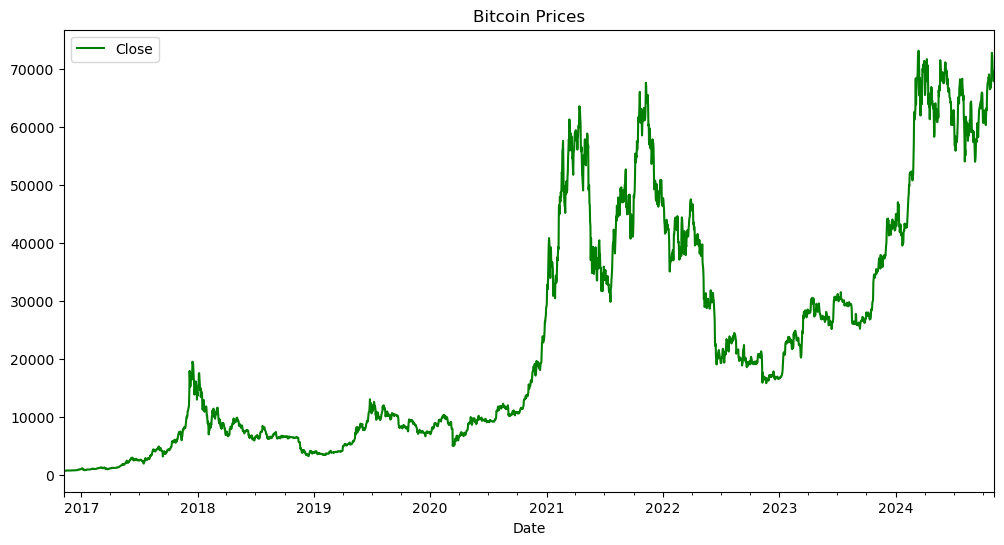

In [368]:
bitcoin_data.plot(title="Bitcoin Prices", figsize=(12, 6), color='green')
plt.show()

In [369]:
sp500 = yf.Ticker("^GSPC")
start_date = "2016-11-08"
end_date = "2024-11-06"
sp500_data = sp500.history(start=start_date, end=end_date).round(2)
display(sp500_data.head(10))
sp500_data.to_csv("/Users/artiomlucunas/Desktop/Master thesis research/sp500_prices.csv")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-08 00:00:00-05:00,2129.92,2146.87,2123.56,2139.56,3921850000,0.0,0.0
2016-11-09 00:00:00-05:00,2131.56,2170.10,2125.35,2163.26,6267590000,0.0,0.0
2016-11-10 00:00:00-05:00,2167.49,2182.30,2151.17,2167.48,6458450000,0.0,0.0
2016-11-11 00:00:00-05:00,2162.71,2165.92,2152.49,2164.45,4993990000,0.0,0.0
2016-11-14 00:00:00-05:00,2165.64,2171.36,2156.08,2164.20,5373670000,0.0,0.0
2016-11-15 00:00:00-05:00,2168.29,2180.84,2166.38,2180.39,4548110000,0.0,0.0
2016-11-16 00:00:00-05:00,2177.53,2179.22,2172.20,2176.94,3847900000,0.0,0.0
2016-11-17 00:00:00-05:00,2178.61,2188.06,2176.65,2187.12,3811730000,0.0,0.0
2016-11-18 00:00:00-05:00,2186.85,2189.89,2180.38,2181.90,3580900000,0.0,0.0


In [370]:
sp500_data = sp500_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
display(sp500_data.head())

,Close
Date,
2016-11-08 00:00:00-05:00,2139.56
2016-11-09 00:00:00-05:00,2163.26
2016-11-10 00:00:00-05:00,2167.48
2016-11-11 00:00:00-05:00,2164.45
2016-11-14 00:00:00-05:00,2164.20


In [371]:
sp500_data.describe().round(2)

,Close
count,2011.00
mean,3605.82
std,942.76
min,2139.56
25%,2773.88
50%,3534.22
75%,4350.29
max,5864.67


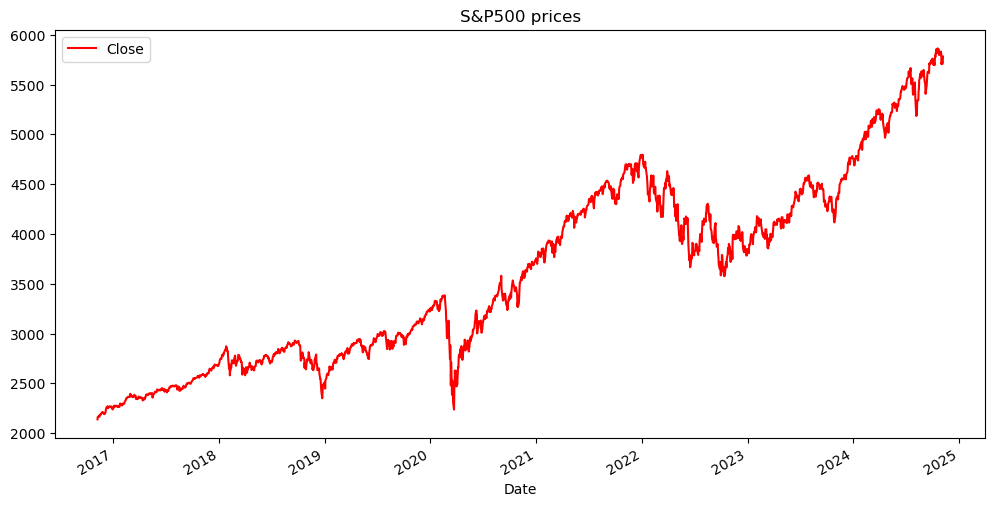

In [372]:
sp500_data.plot(title="S&P500 prices", figsize=(12, 6), color='red')
plt.show()

In [394]:
gold = yf.Ticker("GC=F")
start_date = "2016-11-08"
end_date = "2024-11-06"
gold_data = gold.history(start=start_date, end=end_date).round(2)
display(gold_data.head(10))
gold_data.to_csv("/Users/artiomlucunas/Desktop/Master thesis research/gold_prices.csv")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-08 00:00:00-05:00,1284.1,1289.4,1273.2,1273.4,50,0.0,0.0
2016-11-09 00:00:00-05:00,1272.2,1318.6,1270.0,1272.6,108,0.0,0.0
2016-11-10 00:00:00-05:00,1274.4,1287.5,1253.3,1265.5,63,0.0,0.0
2016-11-14 00:00:00-05:00,1227.8,1229.5,1210.4,1221.2,216,0.0,0.0
2016-11-15 00:00:00-05:00,1224.3,1226.0,1222.5,1224.0,20,0.0,0.0
2016-11-16 00:00:00-05:00,1229.3,1229.3,1223.0,1223.4,66,0.0,0.0
2016-11-17 00:00:00-05:00,1224.6,1225.0,1211.0,1216.5,1139,0.0,0.0
2016-11-18 00:00:00-05:00,1211.9,1211.9,1207.2,1208.5,607,0.0,0.0
2016-11-21 00:00:00-05:00,1209.6,1209.6,1209.6,1209.6,19,0.0,0.0


In [395]:
gold_data = gold_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
display(gold_data.head())

,Close
Date,
2016-11-08 00:00:00-05:00,1273.4
2016-11-09 00:00:00-05:00,1272.6
2016-11-10 00:00:00-05:00,1265.5
2016-11-14 00:00:00-05:00,1221.2
2016-11-15 00:00:00-05:00,1224.0


In [375]:
gold_data.describe().round(2)

,Close
count,2009.00
mean,1676.00
std,359.89
min,1127.80
25%,1304.00
50%,1740.10
75%,1907.50
max,2788.50


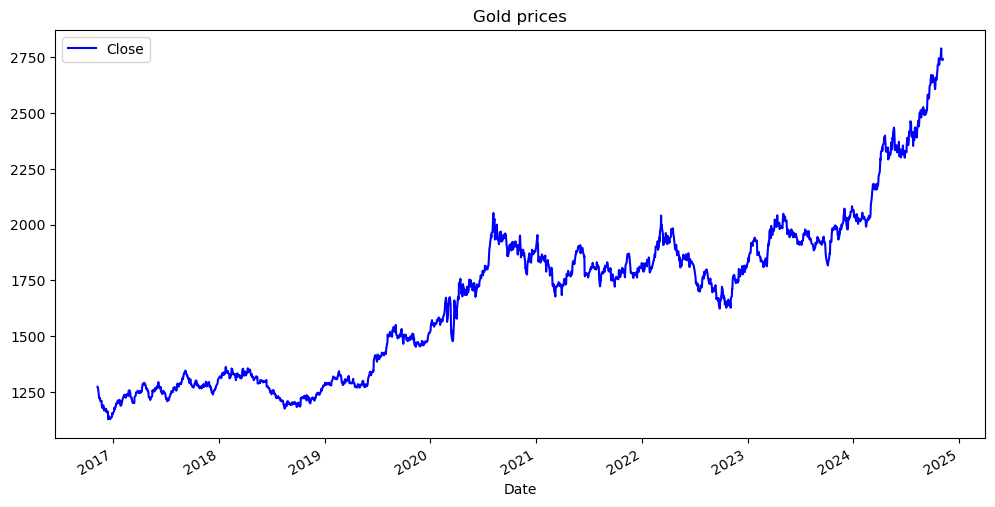

In [376]:
gold_data.plot(title="Gold prices", figsize=(12, 6), color='blue')
plt.show()

In [398]:
oil = yf.Ticker("CL=F")
start_date = "2016-11-08"
end_date = "2024-11-15"
oil_data = oil.history(start=start_date, end=end_date).round(2)
display(oil_data.head(10))
oil_data.to_csv("/Users/artiomlucunas/Desktop/Master thesis research/oil_prices.csv")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-08 00:00:00-05:00,44.97,45.39,44.41,44.98,669639,0.0,0.0
2016-11-09 00:00:00-05:00,44.82,45.95,43.07,45.27,946512,0.0,0.0
2016-11-10 00:00:00-05:00,45.31,45.64,44.25,44.66,686338,0.0,0.0
2016-11-14 00:00:00-05:00,43.20,43.81,42.20,43.32,704766,0.0,0.0
2016-11-15 00:00:00-05:00,43.76,46.09,43.55,45.81,706177,0.0,0.0
2016-11-16 00:00:00-05:00,45.77,46.41,45.03,45.57,658169,0.0,0.0
2016-11-17 00:00:00-05:00,45.37,46.58,44.88,45.42,284874,0.0,0.0
2016-11-18 00:00:00-05:00,44.93,45.77,44.55,45.69,155651,0.0,0.0
2016-11-21 00:00:00-05:00,45.83,47.80,45.77,47.49,665326,0.0,0.0


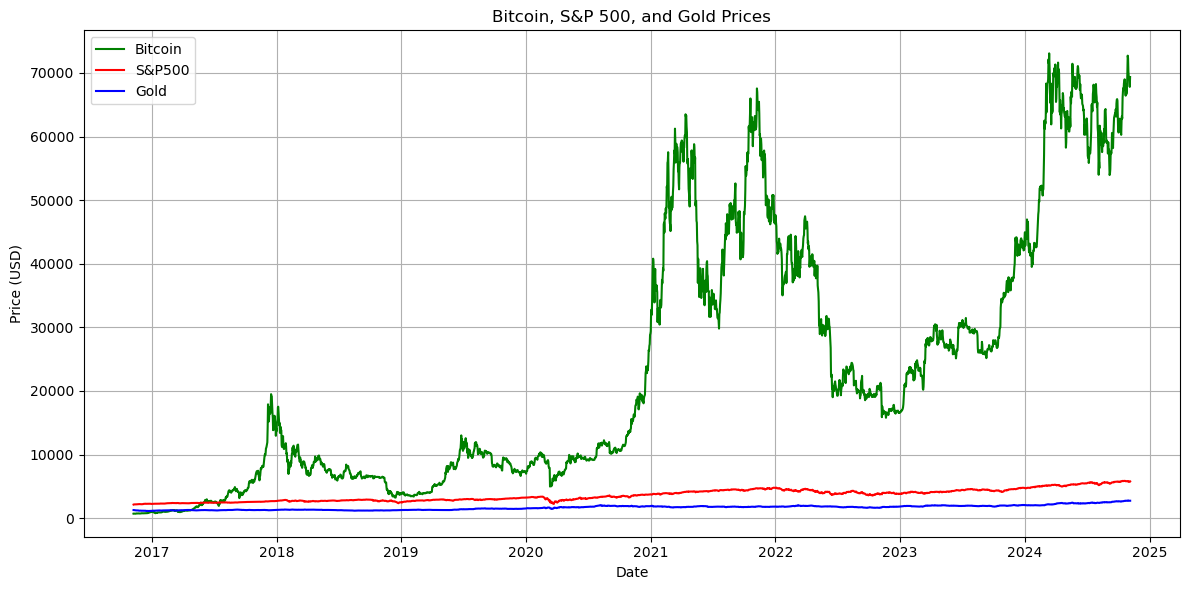

In [377]:
plt.figure(figsize=(12,6))

plt.plot(bitcoin_data.index, bitcoin_data, label = "Bitcoin", color = "green")
plt.plot(sp500_data.index, sp500_data, label = "S&P500", color = "red")
plt.plot(gold_data.index, gold_data, label = "Gold", color = "blue")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin, S&P 500, and Gold Prices')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


#### Using the log transformation to make the bitcoin prices data stationary

In [378]:
log_bitcoin_prices = np.log(bitcoin_data)

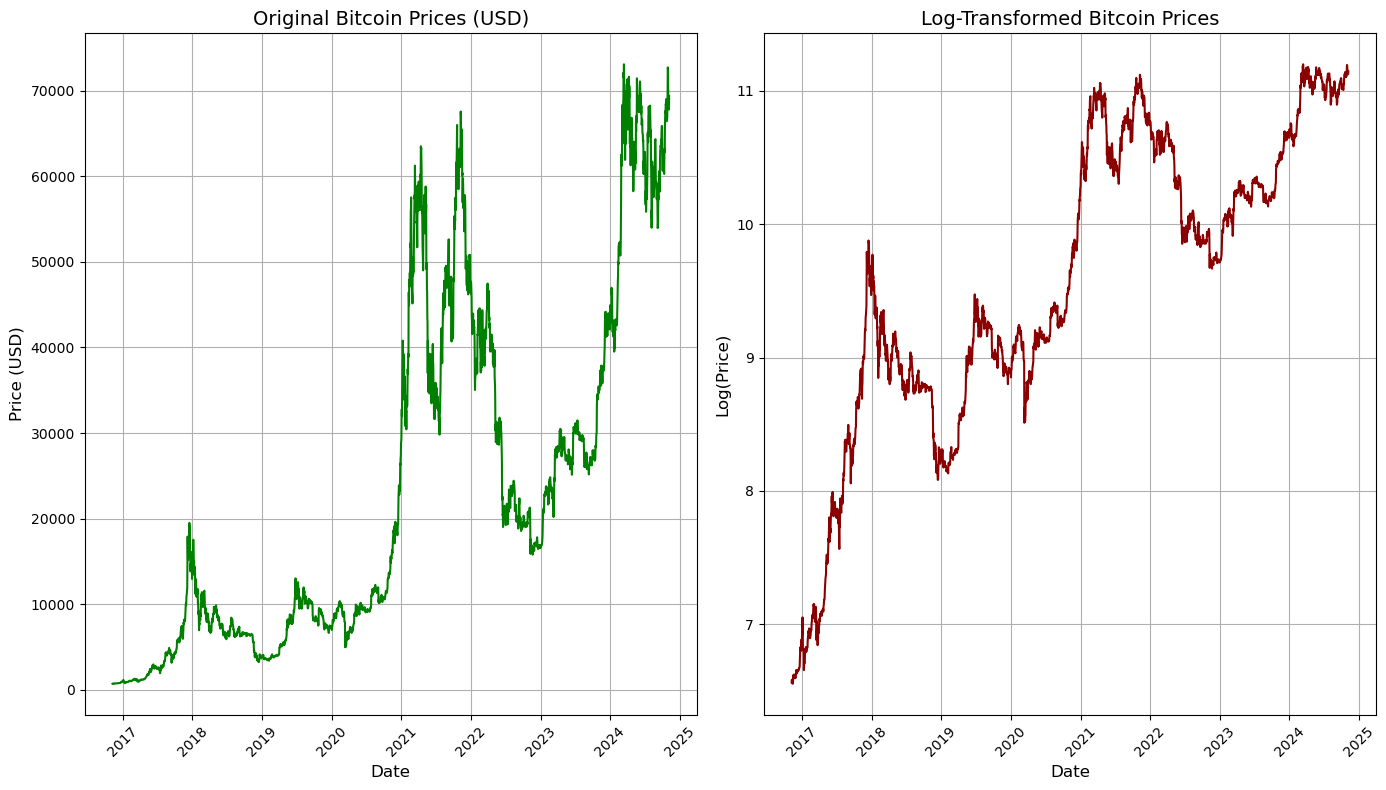

In [379]:
plt.figure(figsize=(14, 8))


plt.subplot(1, 2, 1)
plt.plot(bitcoin_data, color='green')  
plt.title('Original Bitcoin Prices (USD)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)  
plt.xticks(rotation=45)  


plt.subplot(1, 2, 2)
plt.plot(log_bitcoin_prices, color='darkred')  
plt.title('Log-Transformed Bitcoin Prices', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log(Price)', fontsize=12)
plt.grid(True)  
plt.xticks(rotation=45)  


plt.tight_layout()
plt.show()

#### Applying Augmented Dickey Fuller test, checking the stationarity of time series data

In [380]:
bitcoin_adfuller = adfuller(bitcoin_data)
print("ADF Statistic: ", bitcoin_adfuller[0])
print("p-value: ", bitcoin_adfuller[1])
print("Critical Values: ", bitcoin_adfuller[4])

ADF Statistic:  -0.8449819669248878
p-value:  0.8055506918733989
Critical Values:  {'1%': -3.4326139625732837, '5%': -2.862540266114088, '10%': -2.5673024702995892}


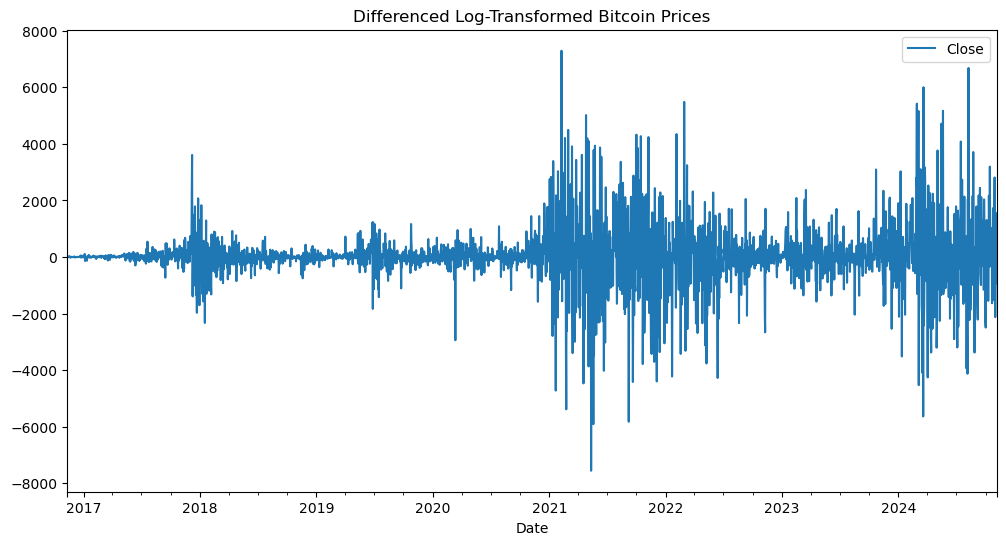

In [381]:
bitcoin_diff = bitcoin_data.diff().dropna()

bitcoin_diff.plot(figsize=(12, 6))
plt.title('Differenced Log-Transformed Bitcoin Prices')
plt.show()

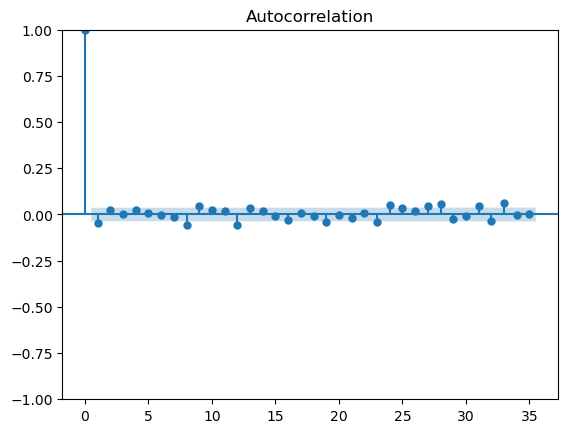

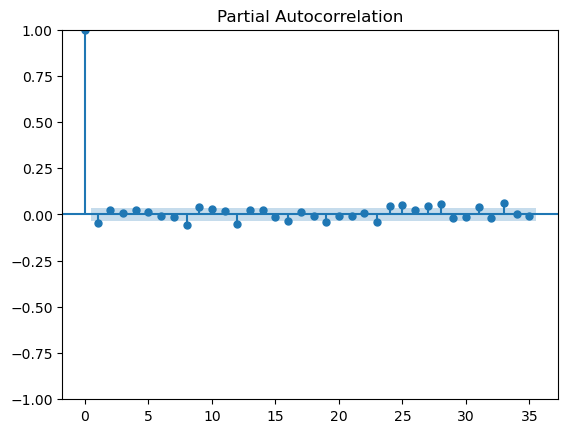

In [382]:
bitcoin_acf = plot_acf(bitcoin_diff)
bitcoin_pacf = plot_pacf(bitcoin_diff)

In [383]:
bitcoin_adfuller = adfuller(bitcoin_diff)
print("ADF Statistic: ", bitcoin_adfuller[0])
print("p-value: ", bitcoin_adfuller[1])
print("Critical Values: ", bitcoin_adfuller[4])

ADF Statistic:  -8.767354775050483
p-value:  2.57602679667874e-14
Critical Values:  {'1%': -3.4326139625732837, '5%': -2.862540266114088, '10%': -2.5673024702995892}


#### After applying differencing the bitcoin data appeared to be stationary, thus I proceed with plotting ACF and PACF plots

#### The differencing has removed most of the autocorrelation, which suggests that the time-series is now stationary. The PACF plot suggests that a potential AR(1) model might be suitable since the first lag is significant, while further lags show no significant correlation. p = 1 (from PACF), d = 1 (differenced the data once, to achieve stationarity), q = 1 (based on ACF showing sharp drop-off)

#### Splitting the data into 4 periods for further analysis and model application

In [384]:
pre_covid_end = "2020-03-10"
covid_start = "2020-03-11"
covid_end = "2022-02-23"
war_start = "2022-02-24"
full_end = "2024-11-05"

#### Creating dummy variables for interventions

In [385]:
bitcoin_diff['covid'] = ((bitcoin_diff.index >= covid_start) & (bitcoin_diff.index <= covid_end)).astype(int)
bitcoin_diff['war'] = ((bitcoin_diff.index >= war_start) & (bitcoin_diff.index <= full_end)).astype(int)
display(bitcoin_diff.head())

,Close,covid,war
Date,,,
2016-11-09 00:00:00+00:00,13.42,0,0
2016-11-10 00:00:00+00:00,-7.74,0,0
2016-11-11 00:00:00+00:00,0.88,0,0
2016-11-12 00:00:00+00:00,-11.36,0,0
2016-11-13 00:00:00+00:00,-3.02,0,0


In [386]:
pre_covid_btc = bitcoin_diff[:pre_covid_end]
covid_btc = bitcoin_diff[covid_start:covid_end]
war_btc = bitcoin_diff[war_start:]
full_btc = bitcoin_diff[:full_end]

In [387]:
X = full_btc.drop(columns=['Close'])
y = full_btc['Close']

#### Using the full data for the period, performing the train-test split

In [388]:
train_size = int(len(full_btc) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [389]:
model = auto_arima(y, x=X, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=48637.170, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48642.484, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=48638.673, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=48638.942, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48642.084, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=48641.040, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=48641.055, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=48644.415, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=48639.512, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=48642.917, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=48643.066, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=48637.834, Time=1.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=48641.707, Time=0.35 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 5.408

In [399]:
model = ARIMA(y_train, order=(1,1,1), exog=X_train)

arimax_fit = model.fit()

print(arimax_fit.summary())

/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2335
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19266.613
Date:                Sun, 16 Feb 2025   AIC                          38543.227
Time:                        12:17:16   BIC                          38572.004
Sample:                    11-09-2016   HQIC                         38553.711
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
covid         19.8709    275.909      0.072      0.943    -520.901     560.643
war         2036.7810    306.216      6.651      0.000    1436.609    2636.953
ar.L1         -0.0361      0.012     -2.951      0.0

In [400]:
X = covid_btc.drop(columns=['Close'])
y = covid_btc['Close']

In [401]:
train_size = int(len(full_btc) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [402]:
model = ARIMA(y_train, order=(1,1,1), exog=X_train)

arimax_fit = model.fit()

print(arimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  715
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6206.717
Date:                Sun, 16 Feb 2025   AIC                          12423.434
Time:                        12:20:35   BIC                          12446.289
Sample:                    03-11-2020   HQIC                         12432.261
                         - 02-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
covid          0.0082   2474.840   3.33e-06      1.000   -4850.589    4850.606
war                 0        nan        nan        nan         nan         nan
ar.L1         -0.0284      0.033     -0.868      0.3

/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/artiomlucunas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
